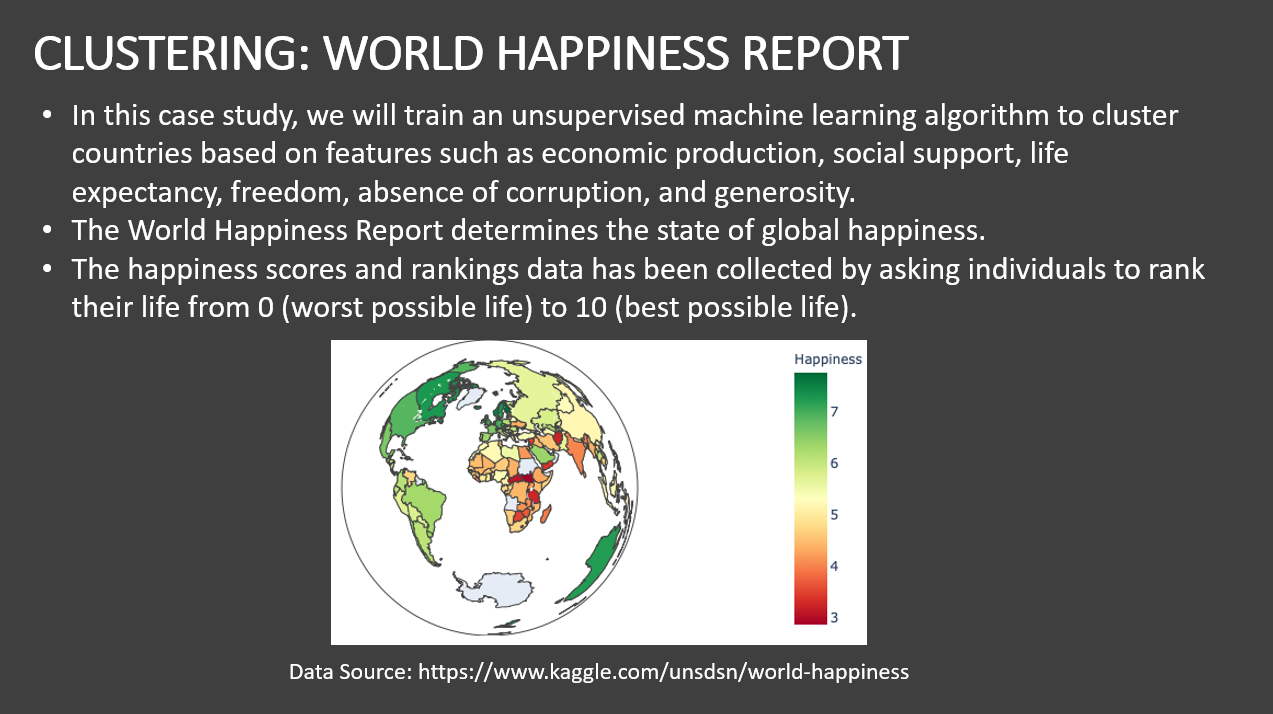

### IMPORT DATASETS AND LIBRARIES

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot
from plotly.offline import iplot

In [3]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  


In [4]:
# Import csv file into pandas dataframe
df = pd.read_csv('happiness_report.csv')

In [5]:
# print the first 5 rows of the dataframe
df.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [6]:
#how many samples exist in the DataFrame
df.shape

(156, 9)

In [7]:
x=df[df['Country or region']=='Sri Lanka']

In [8]:
x

Overall rank Country or region  Score  GDP per capita  Social support  \
129           130         Sri Lanka  4.366           0.949           1.265   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
129                    0.831                          0.47       0.244   

     Perceptions of corruption  
129                      0.047

### PERFORM EXPLORATORY DATA ANALYSIS

In [9]:
# Check the number of non-null values in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [10]:
# Check Null values
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [11]:
# Obtain the Statistical summary of the dataframe
df.describe()

Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%                   0.547750                      0.308000    0.108750   
50%                   0.789000                      0.417000    0.177500   
75%                   0.881750                      0.507250    0.248250   
max                   1.141000                      0.631000    0.566000   

       Perceptions of corruption  
count                 156.000000  
mean                    0.110603  
std                     0.094538  
min                     0.000000  
25%                     0.047000  
50%                     0.085500  
75%                     0.141250  
max                     0.453000

In [12]:
# check the number of duplicated entries in the dataframe
df.duplicated().sum()

0

In [13]:
x = df[df['Overall rank']==1]
x

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769            1.34           1.587   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   

   Perceptions of corruption  
0                      0.393

### PERFORM DATA VISUALIZATION 

<Figure size 2000x2000 with 0 Axes>

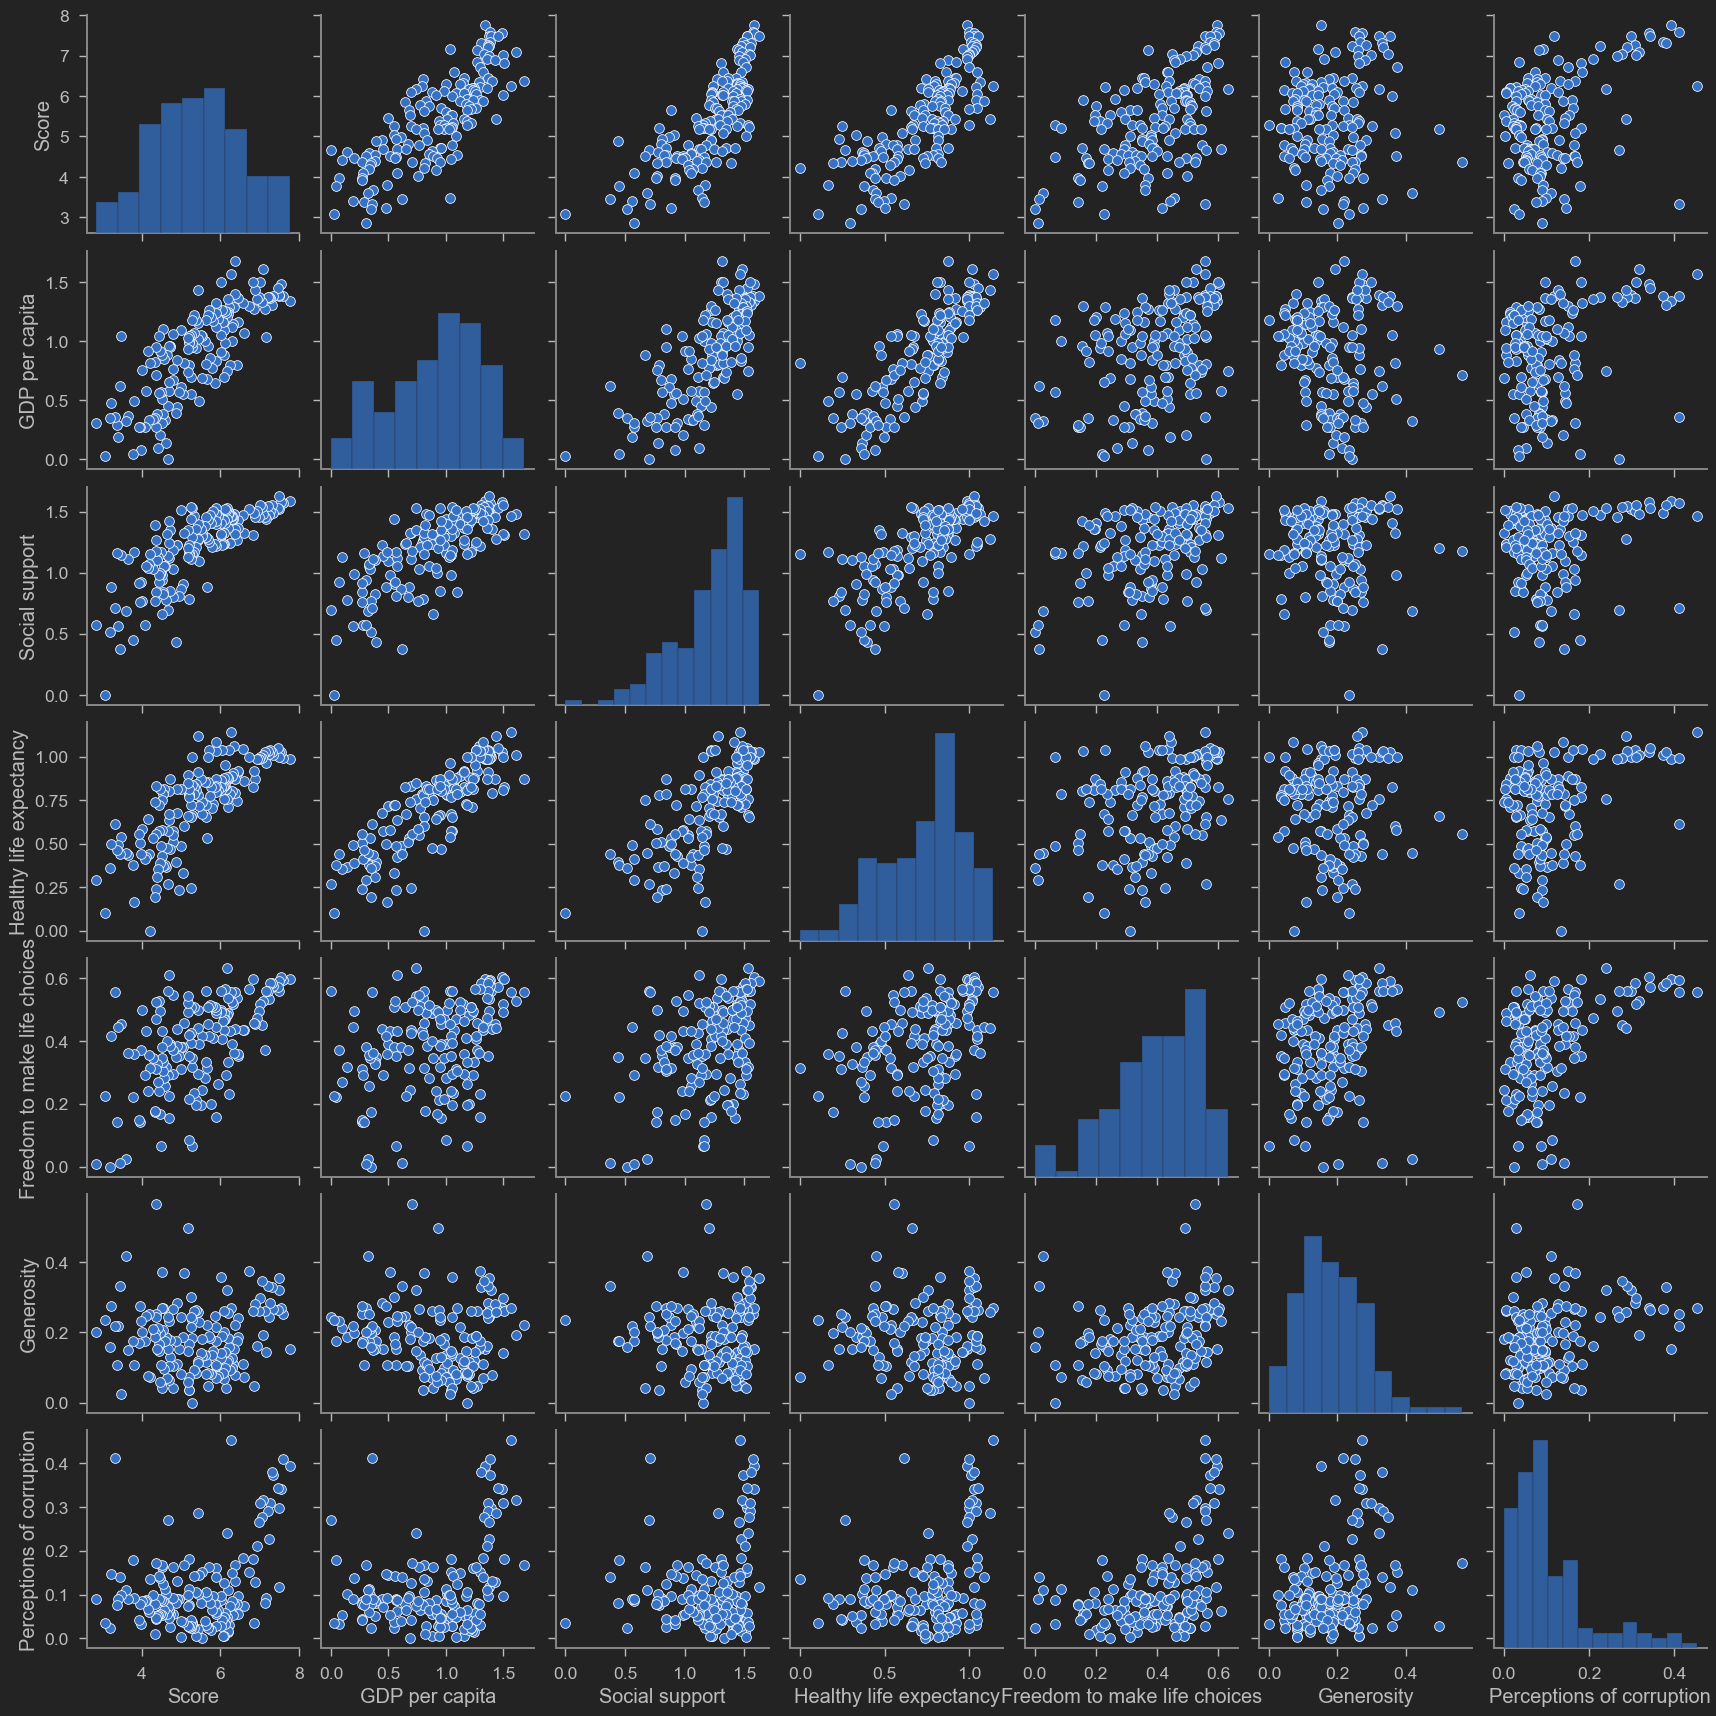

In [14]:
# Plot the pairplot
fig = plt.figure(figsize = (20,20))
sns.pairplot(df[['Score',	'GDP per capita',	'Social support',	'Healthy life expectancy',	'Freedom to make life choices',	'Generosity',	'Perceptions of corruption']])
# Positive correlation between GDP and score 
# Positive correlation between Social Support and score 


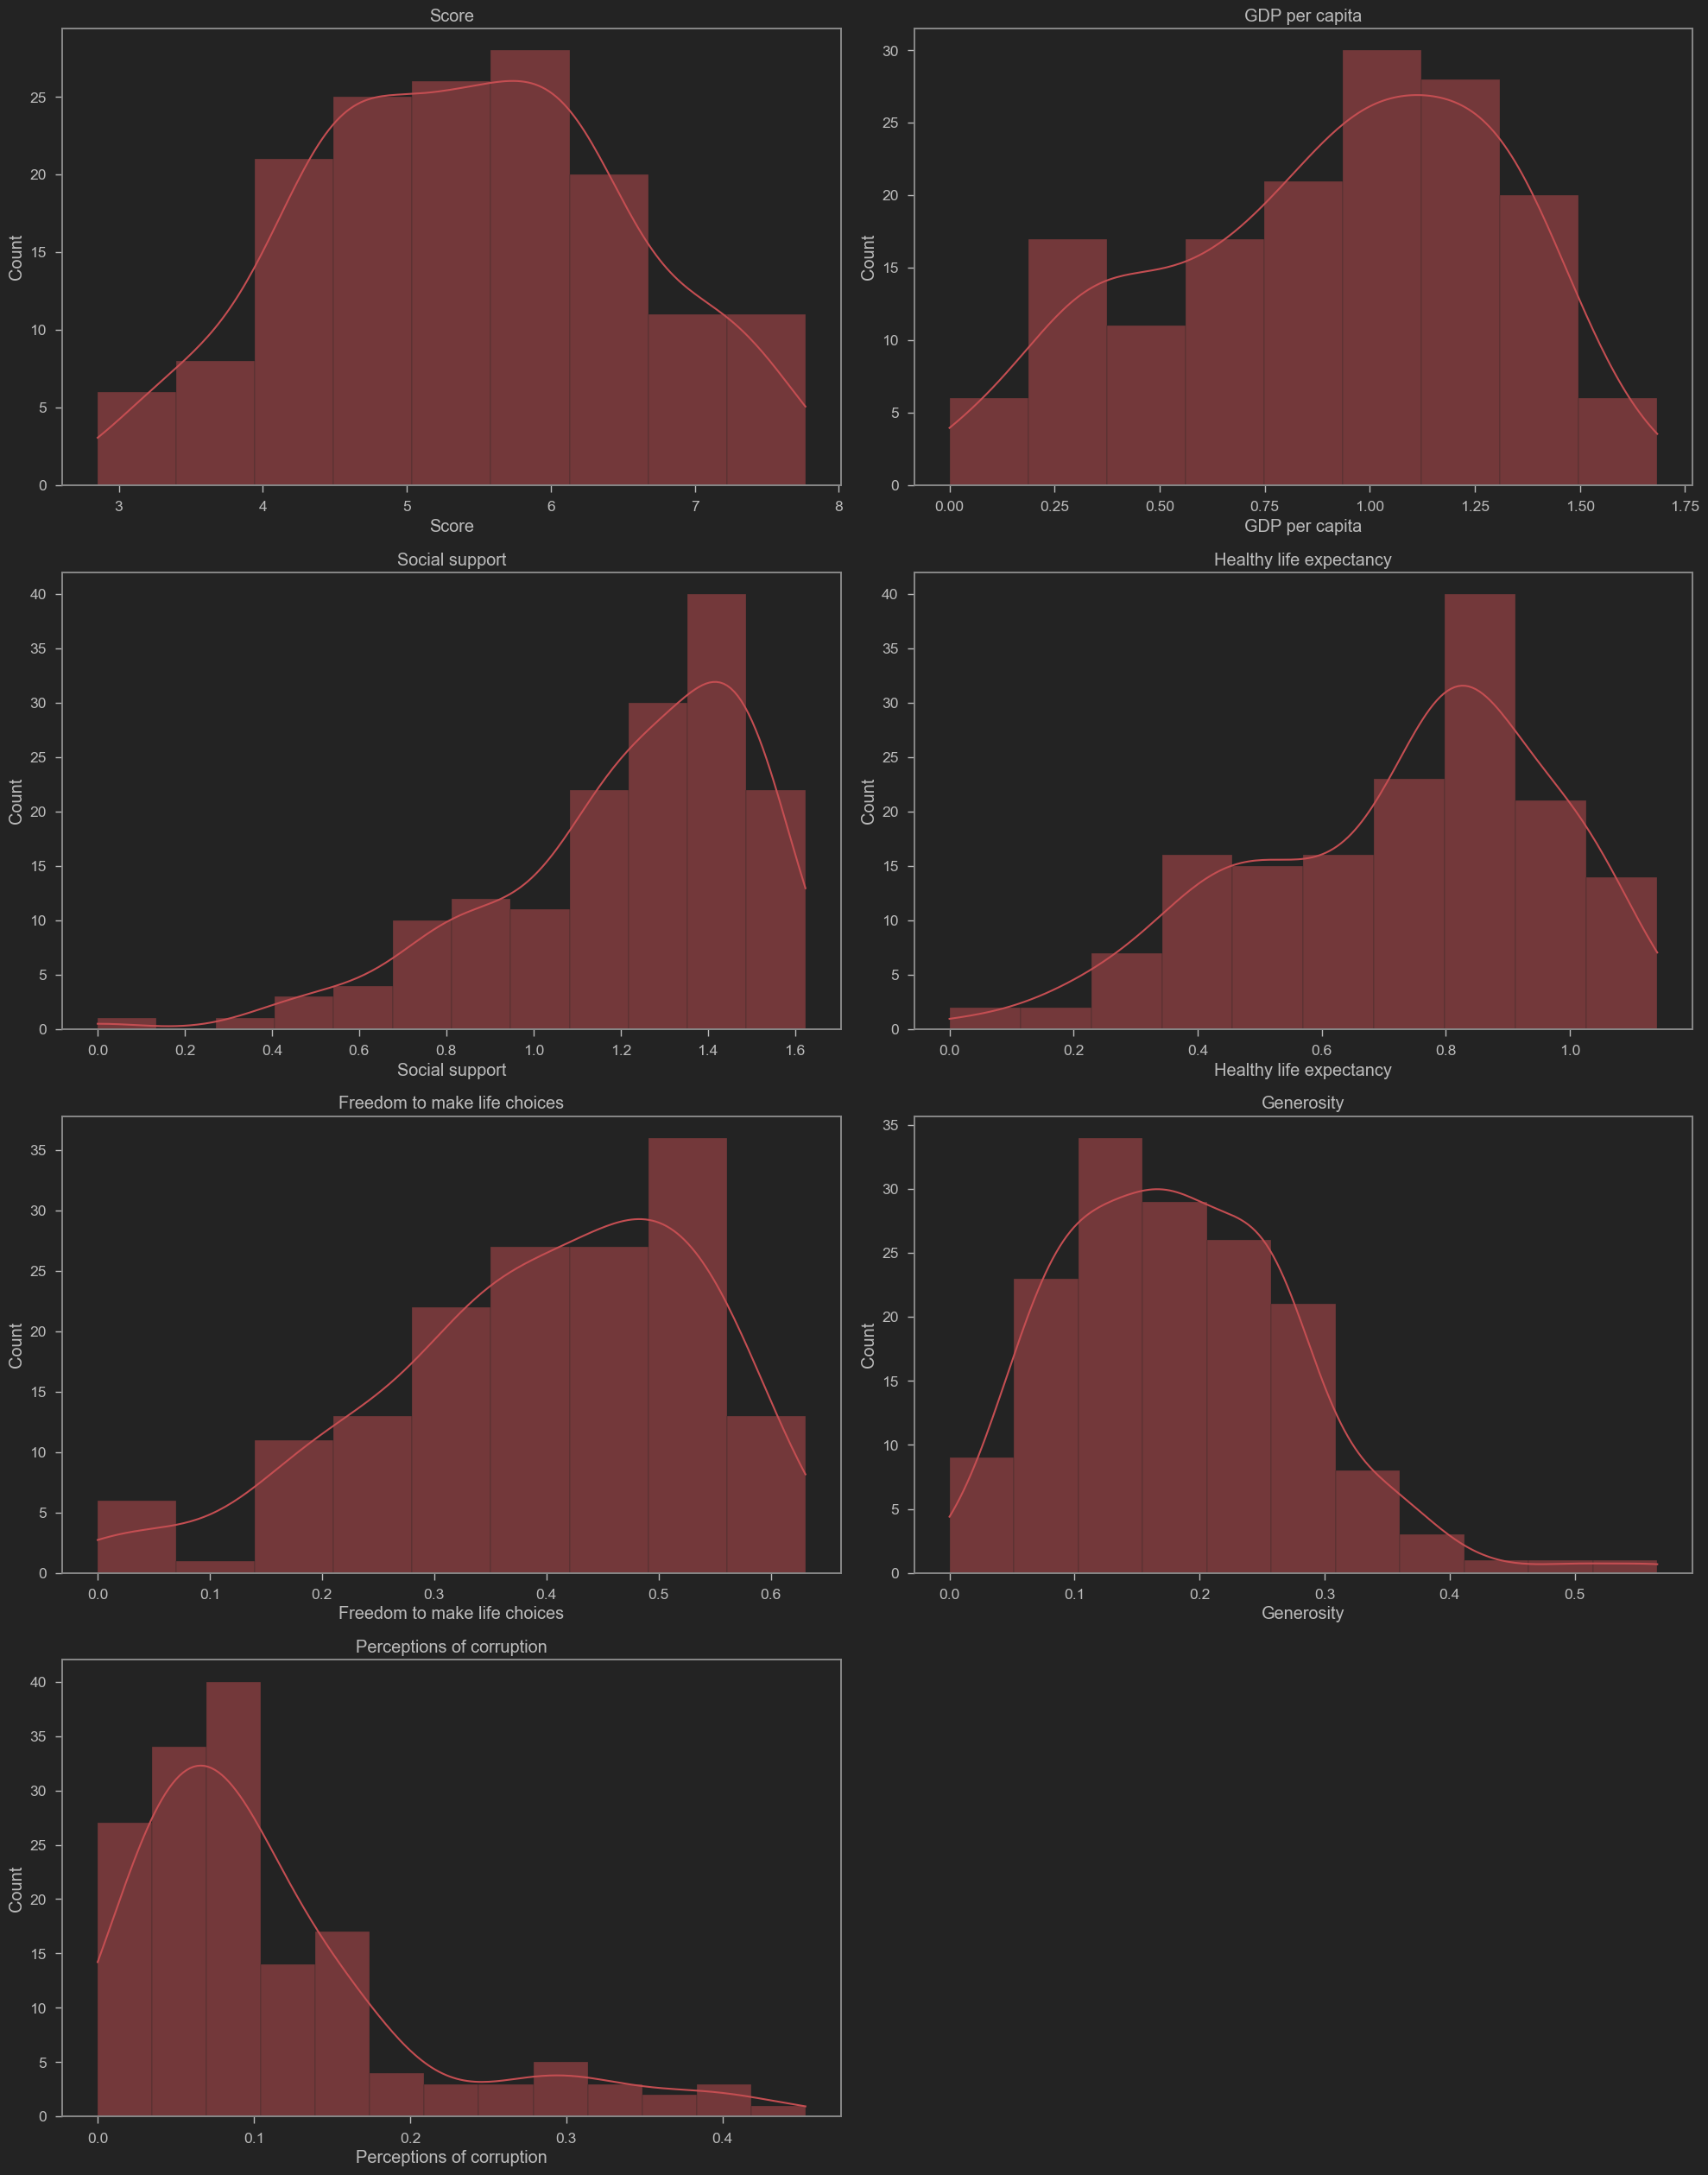

In [15]:


columns = ['Score','GDP per capita', 'Social support', 'Healthy life expectancy', 
    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

plt.figure(figsize=(20, 50))

for i, col in enumerate(columns):
    plt.subplot(8, 2, i + 1)
    sns.histplot(df[col], color='r', kde=True)  # 'kde=True' adds the smooth curve
    plt.title(col)

plt.tight_layout()
plt.show()


In [16]:
#correlation matrix
df_corr = df.drop('Country or region',axis=1)
corr_matrix = df_corr.corr()
corr_matrix


Overall rank     Score  GDP per capita  \
Overall rank                      1.000000 -0.989096       -0.801947   
Score                            -0.989096  1.000000        0.793883   
GDP per capita                   -0.801947  0.793883        1.000000   
Social support                   -0.767465  0.777058        0.754906   
Healthy life expectancy          -0.787411  0.779883        0.835462   
Freedom to make life choices     -0.546606  0.566742        0.379079   
Generosity                       -0.047993  0.075824       -0.079662   
Perceptions of corruption        -0.351959  0.385613        0.298920   

                              Social support  Healthy life expectancy  \
Overall rank                       -0.767465                -0.787411   
Score                               0.777058                 0.779883   
GDP per capita                      0.754906                 0.835462   
Social support                      1.000000                 0.719009   
Healthy life expectancy             0.719009                 1.000000   
Freedom to make life choices        0.447333                 0.390395   
Generosity                         -0.048126                -0.029511   
Perceptions of corruption           0.181899                 0.295283   

                              Freedom to make life choices  Generosity  \
Overall rank                                     -0.546606   -0.047993   
Score                                             0.566742    0.075824   
GDP per capita                                    0.379079   -0.079662   
Social support                                    0.447333   -0.048126   
Healthy life expectancy                           0.390395   -0.029511   
Freedom to make life choices                      1.000000    0.269742   
Generosity                                        0.269742    1.000000   
Perceptions of corruption                         0.438843    0.326538   

                              Perceptions of corruption  
Overall rank                                  -0.351959  
Score                                          0.385613  
GDP per capita                                 0.298920  
Social support                                 0.181899  
Healthy life expectancy                        0.295283  
Freedom to make life choices                   0.438843  
Generosity                                     0.326538  
Perceptions of corruption                      1.000000

<Axes: >

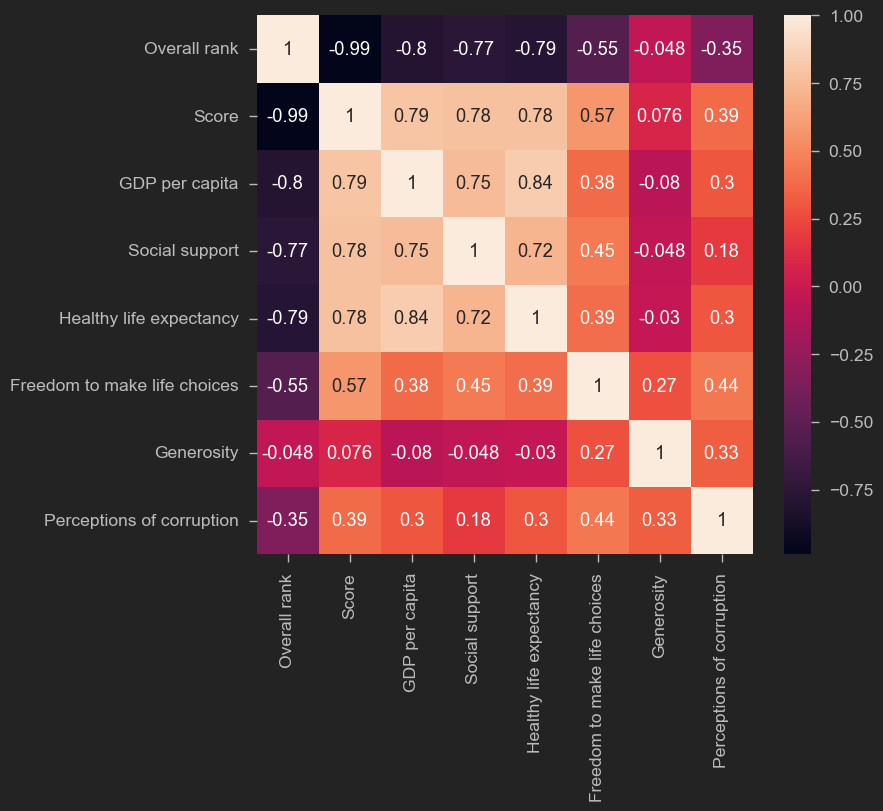

In [17]:
sns.heatmap(corr_matrix,annot=True)

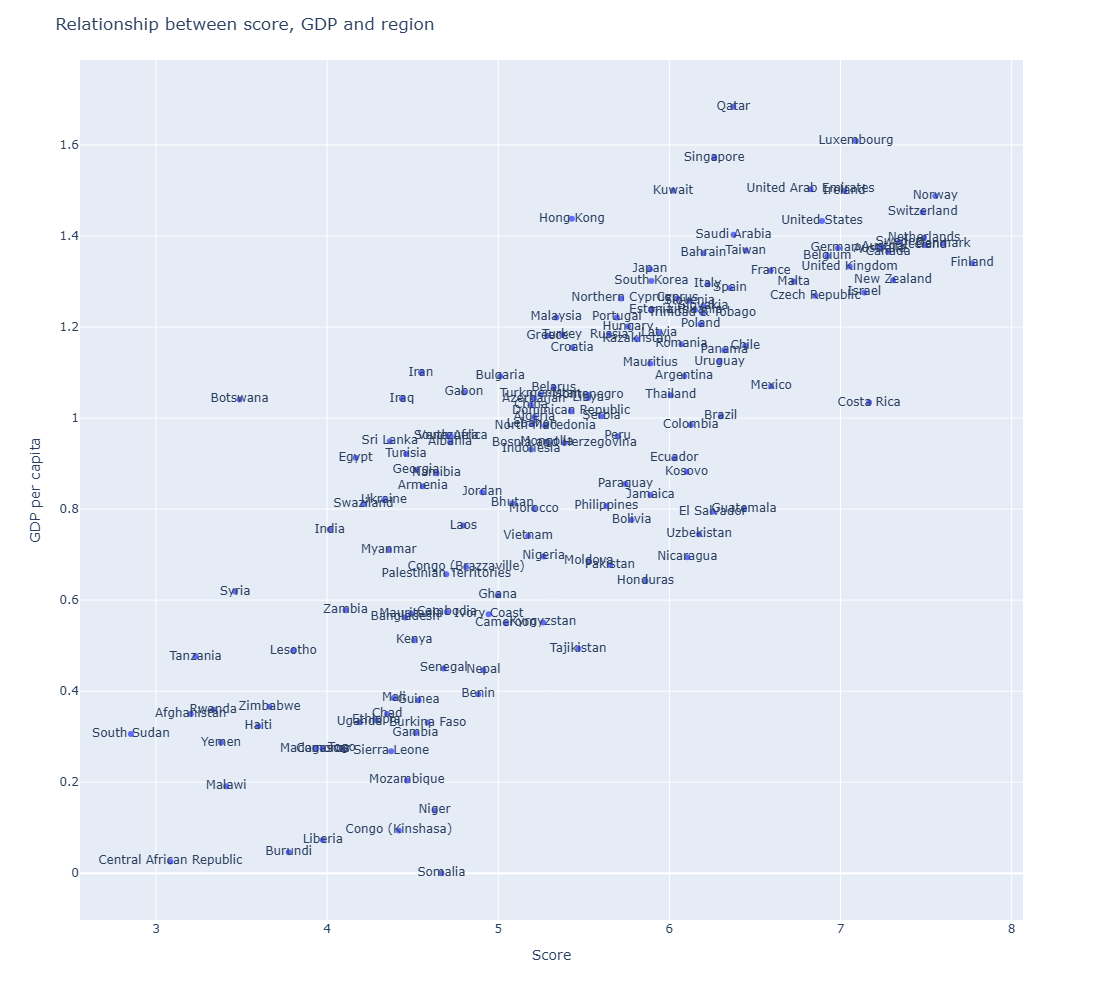

In [18]:
# Plot the relationship between score, GDP and region
fig = px.scatter(df,'Score','GDP per capita',text='Country or region')
fig.update_layout(title_text = 'Relationship between score, GDP and region',height=1000)
fig.show()


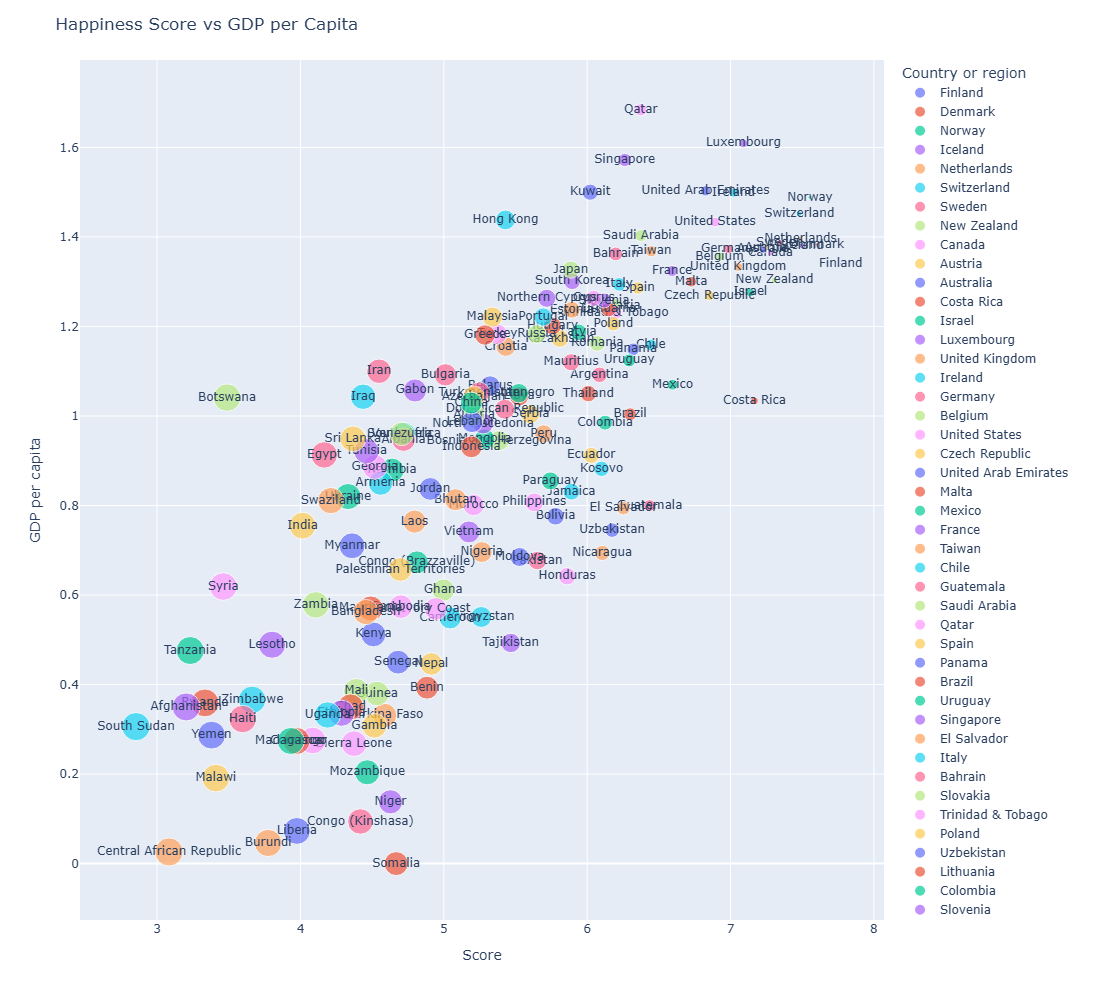

In [19]:
# Plot the relationship between score and GDP (while adding color and size)
fig = px.scatter(df,'Score','GDP per capita',text='Country or region',size='Overall rank',color='Country or region')
fig.update_layout(title_text = 'Happiness Score vs GDP per Capita',height=1000)
fig.show()

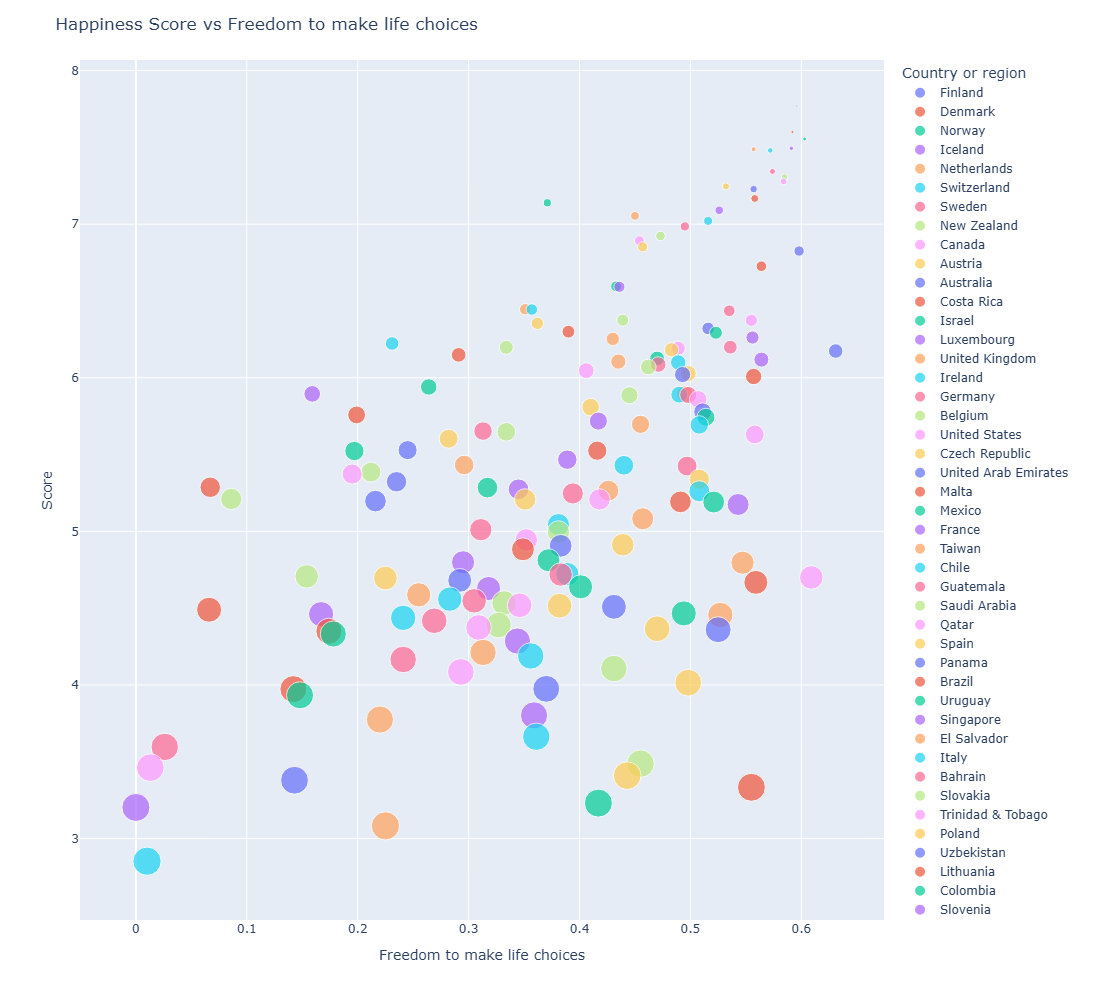

In [20]:
# Plot the relationship between score and freedom to make life choices

fig = px.scatter(df, x = 'Freedom to make life choices', y = "Score", size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(title_text = 'Happiness Score vs Freedom to make life choices',height=1000)
fig.show()

MINI CHALLENGE #4: 
- Plot a similar type of plots for 'Healthy life expectancy' and 'Score'

In [21]:
fig = px.scatter(df, x = 'Healthy life expectancy', y = "Score", size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")
#fig.update_traces(textposition='top_center')
fig.update_layout(title_text = 'Happiness Score vs Healthy life expectancy',height = 1000)
fig.show()

### PREPARE THE DATA TO FEED THE CLUSTERING MODEL

In [22]:
# We are going to create clusters without the use of happiness score and rank to see which countries fall under similar clusters

In [23]:
# Select the data without rank and happiness score
df_seg = df.drop(['Overall rank','Score','Country or region'],axis=1)

In [24]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_seg)
scaled_data

array([[ 1.09504166e+00,  1.26809758e+00,  1.08042247e+00,
         1.42428230e+00, -3.35403977e-01,  2.99675712e+00],
       [ 1.20332385e+00,  1.22115409e+00,  1.12185663e+00,
         1.39627687e+00,  7.07264909e-01,  3.17715844e+00],
       [ 1.46773387e+00,  1.25133205e+00,  1.25444597e+00,
         1.47329179e+00,  9.07373079e-01,  2.44494130e+00],
       [ 1.19576928e+00,  1.39216252e+00,  1.24615914e+00,
         1.38927551e+00,  1.78152982e+00,  7.85004247e-02],
       [ 1.23606033e+00,  1.05014566e+00,  1.13428688e+00,
         1.15122941e+00,  1.44450554e+00,  1.98863208e+00],
       [ 1.37707901e+00,  1.06355808e+00,  1.35388797e+00,
         1.25624975e+00,  8.23117007e-01,  2.46616499e+00],
       [ 1.21339662e+00,  9.32786931e-01,  1.17572105e+00,
         1.27025246e+00,  8.65245043e-01,  2.78452027e+00],
       [ 1.00186860e+00,  1.16750438e+00,  1.24615914e+00,
         1.34726738e+00,  1.52876161e+00,  2.85880316e+00],
       [ 1.15799642e+00,  9.93142848e-01,  1.300

### FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

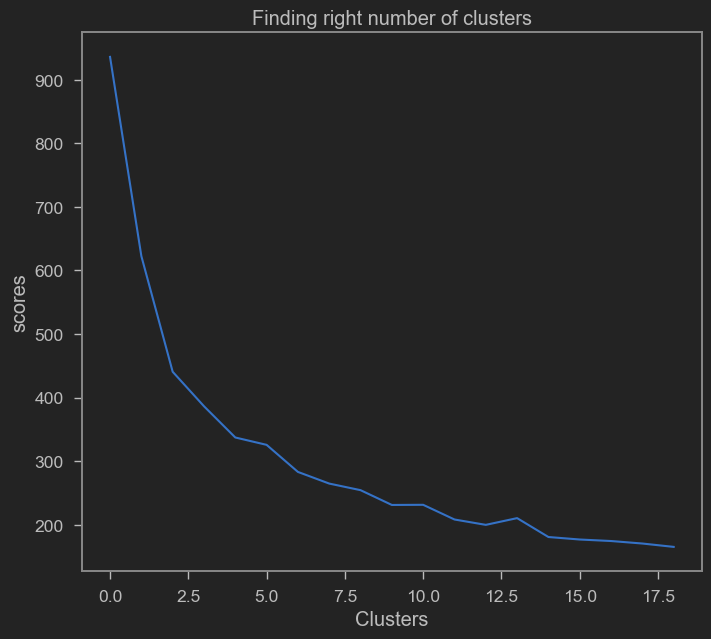

In [25]:

scores = []

rangeOfK=range(1,20)

for i in rangeOfK:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

### APPLY K-MEANS METHOD

In [26]:
kmeans=KMeans(3)
kmeans.fit(scaled_data)

KMeans(n_clusters=3)

In [27]:
labels = kmeans.labels_

In [28]:
 kmeans.cluster_centers_

array([[ 0.36233812,  0.35417648,  0.39592016, -0.06408934, -0.51256741,
        -0.43743725],
       [-1.20026342, -1.05745283, -1.19456698, -0.40049974,  0.43364762,
        -0.09973522],
       [ 1.23376112,  0.95932021,  1.09897777,  1.08730398,  0.94812737,
         1.81007629]])

In [29]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_seg.columns])
cluster_centers      

GDP per capita Social support Healthy life expectancy  \
0       0.362338       0.354176                0.395920   
1      -1.200263      -1.057453               -1.194567   
2       1.233761       0.959320                1.098978   

  Freedom to make life choices Generosity Perceptions of corruption  
0                    -0.064089  -0.512567                 -0.437437  
1                    -0.400500   0.433648                 -0.099735  
2                     1.087304   0.948127                  1.810076

In [30]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_seg.columns])
cluster_centers


GDP per capita Social support Healthy life expectancy  \
0       1.049036       1.314440                0.820798   
1       0.428510       0.893449                0.436939   
2       1.395087       1.494913                0.990478   

  Freedom to make life choices Generosity Perceptions of corruption  
0                     0.383417   0.136179                  0.069381  
1                     0.335367   0.226020                  0.101204  
2                     0.547870   0.274870                  0.281174

- Cluster 0: countries that have GDP in the range of 0.6 to 1.4 and have high social support. These countries have medium life expectancy and have high freedom to make life choices. These counties have low generosity and low perception of corruption.

- Cluster 1: countries that have very high GDP, high social support and high life expectancy. These counties have high freedom to make life choices, medium generosity and medium perception of corruption.

- Cluster 2: countries that have low GDP average life expectancy and average social support. These counties have low freedom to make life choices, high generosity and medium perception of corruption.

In [31]:
labels.shape # Labels associated to each data point

(156,)

In [32]:
labels.max()

2

In [33]:
labels.min()

0

In [34]:
y_kmeans = kmeans.fit_predict(scaled_data)
y_kmeans


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1])

In [35]:
# concatenate the clusters labels to our original dataframe
happy_df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
happy_df_cluster

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1             1.573                    0.996                         0.592   
2             1.582                    1.028                         0.603   
3             1.624                    1.026                         0.591   
4             1.522                    0.999                         0.557   
..              ...                      ...                           ...   
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  cluster  
0         0.153                      0.393        2  
1         0.252                      0.410        2  
2         0.271                      0.341        2  
3         0.354                      0.118        2  
4         0.322                      0.298        2  
..          ...                        ...      ...  
151       0.217                      0.411        1  
152       0.276                      0.147        1  
153       0.158                      0.025        1  
154       0.235                      0.035        1  
155       0.202                      0.091        1  

[156 rows x 10 columns]

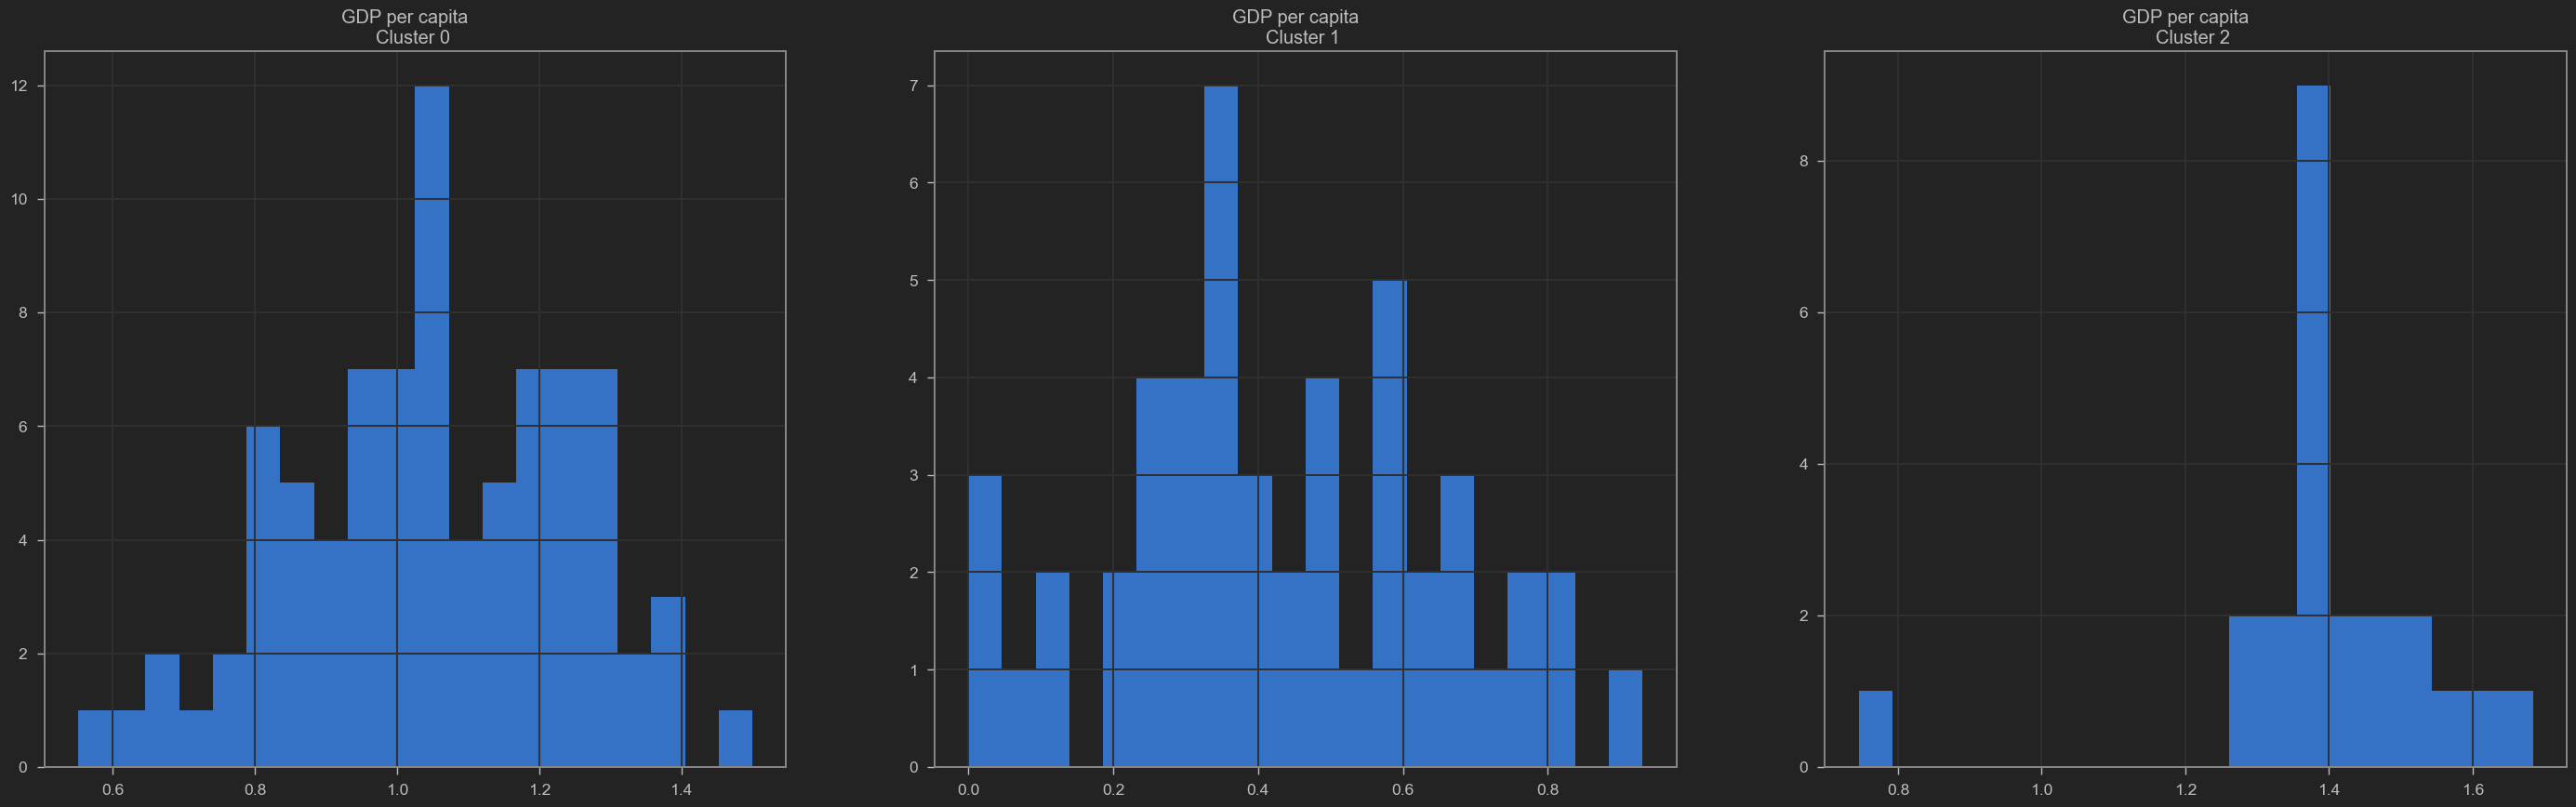

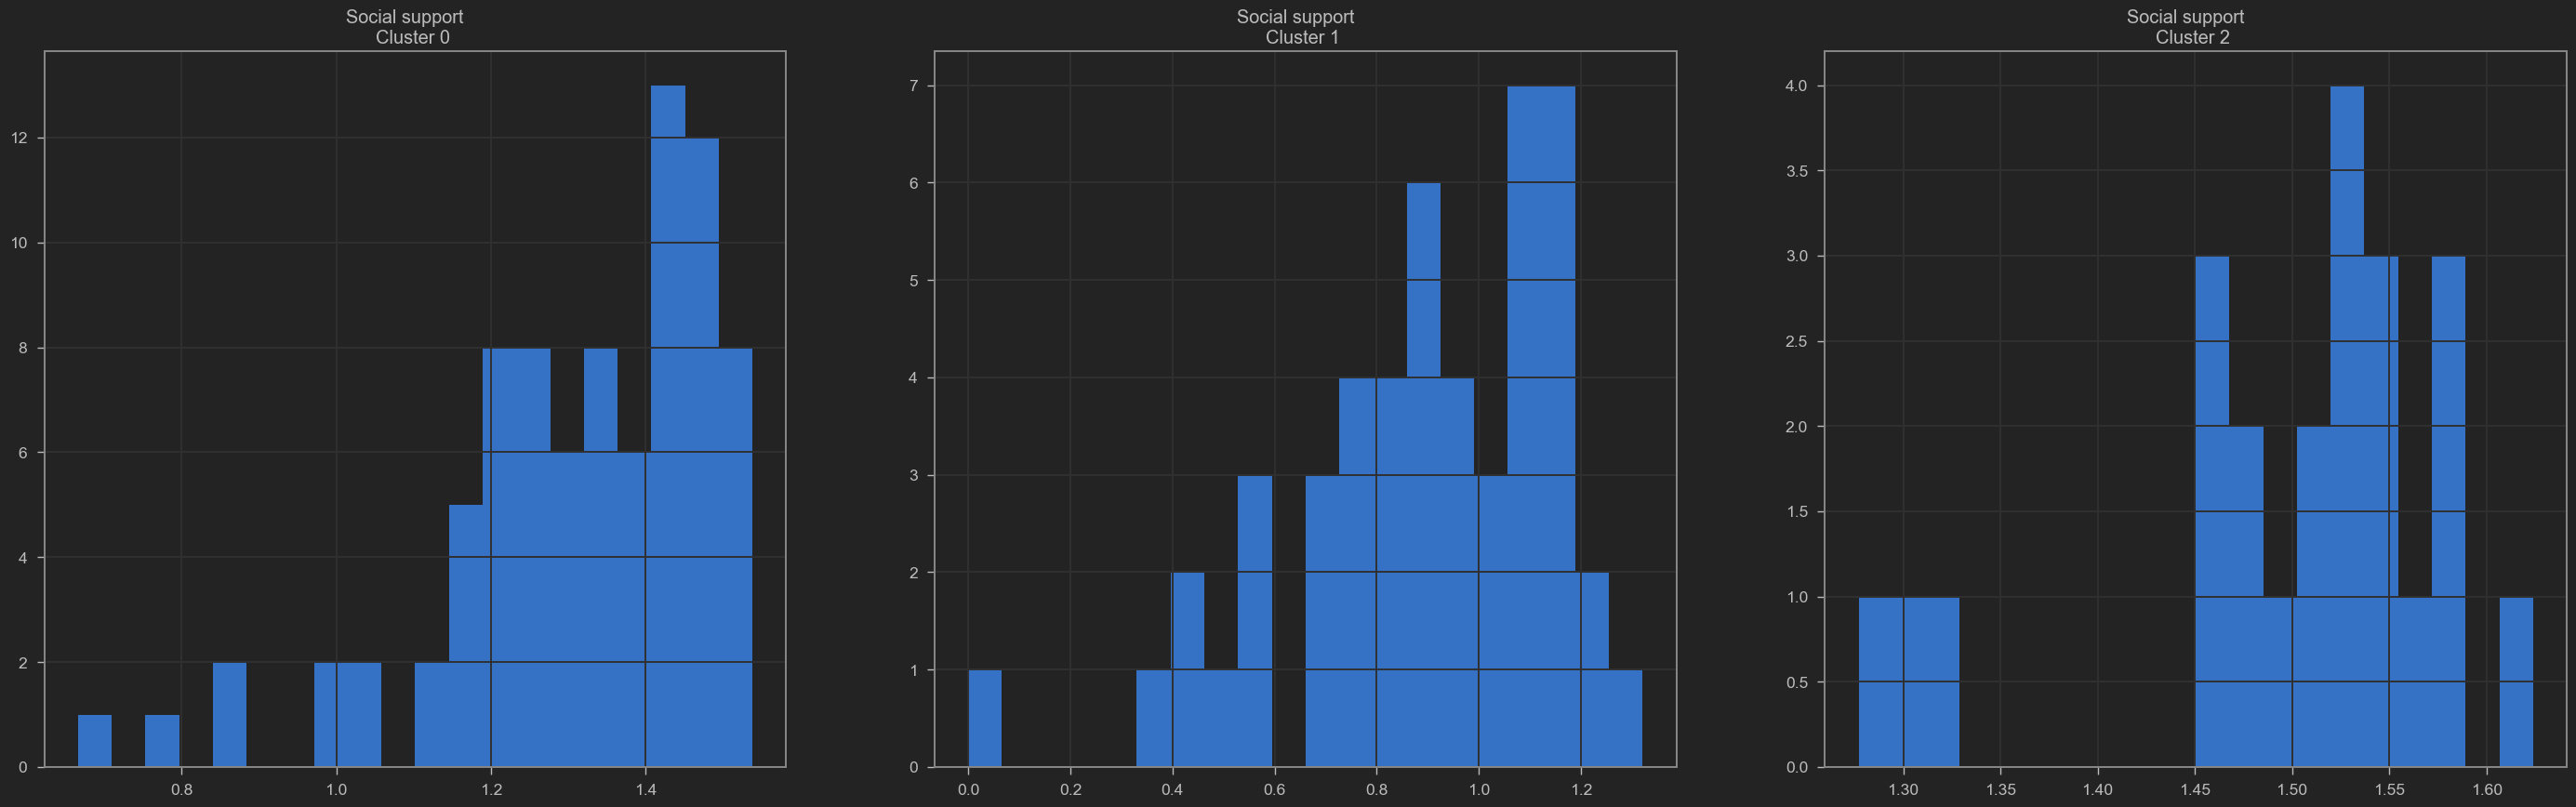

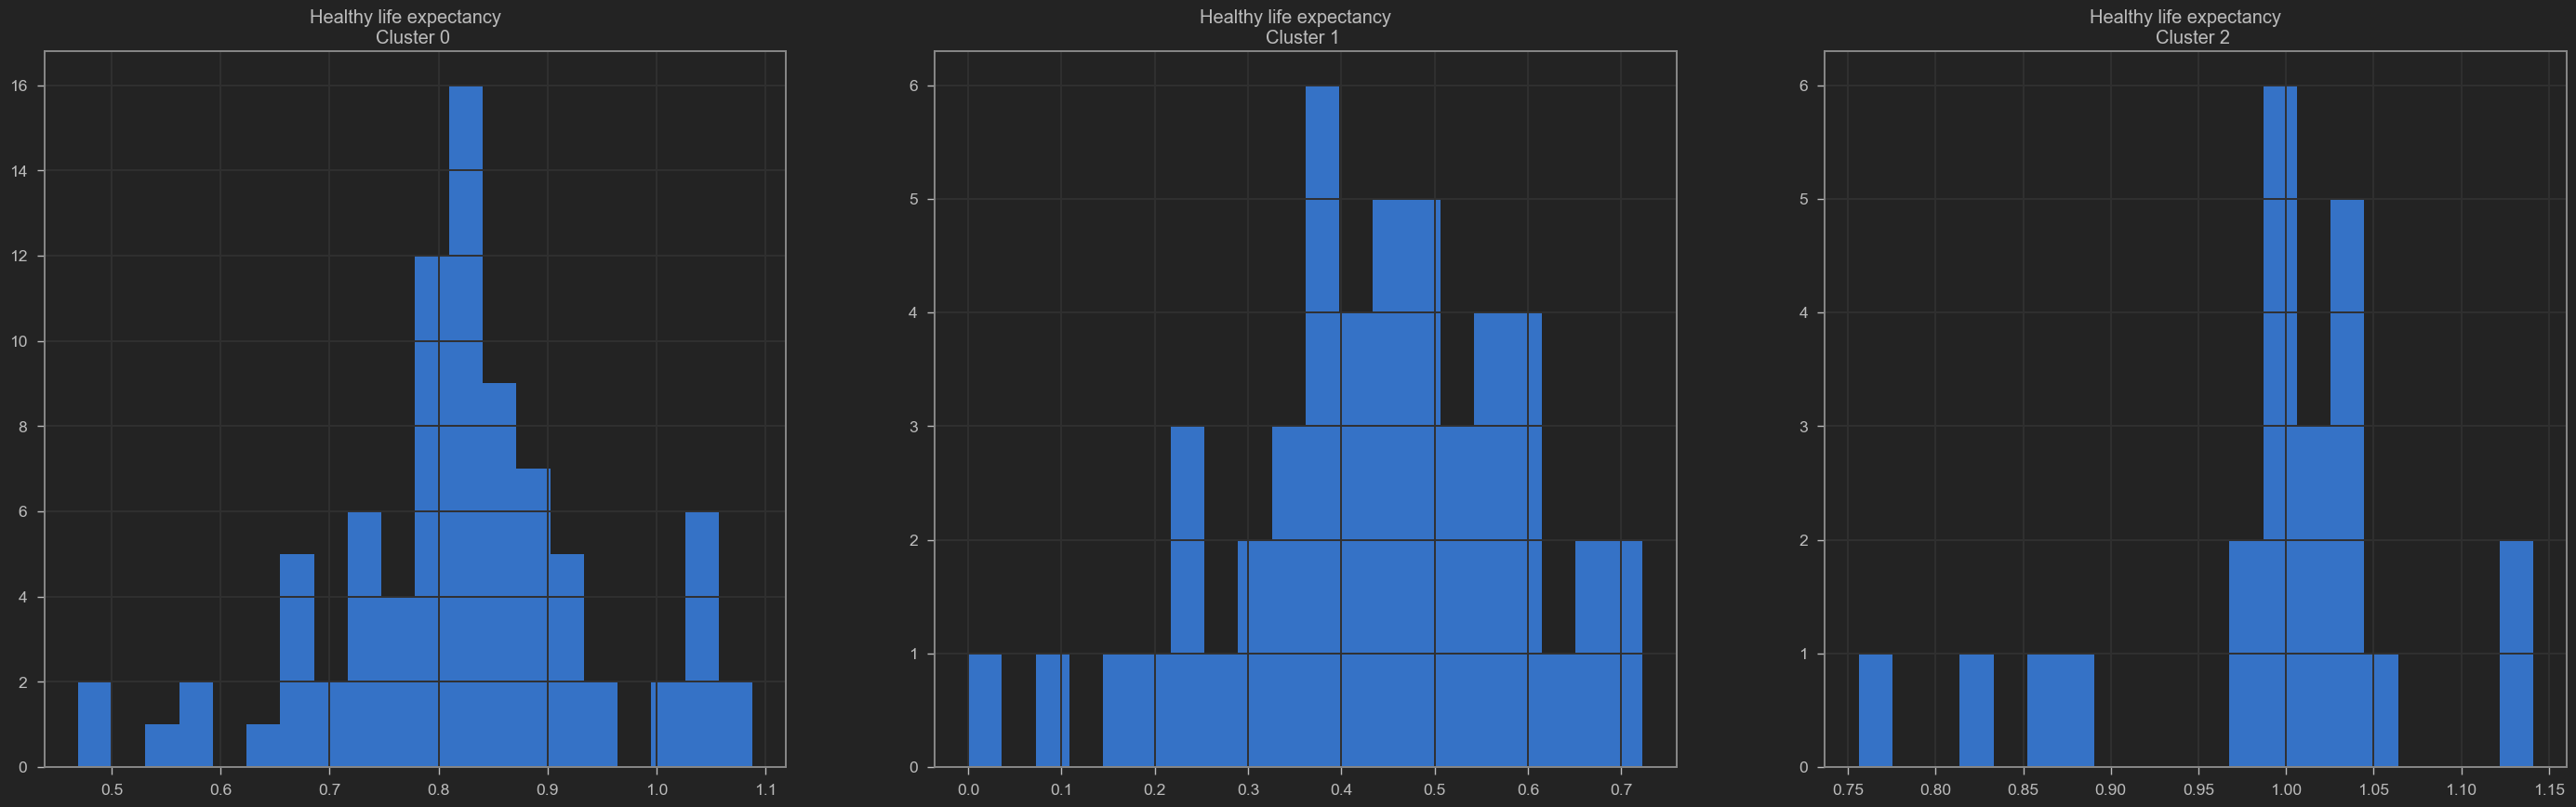

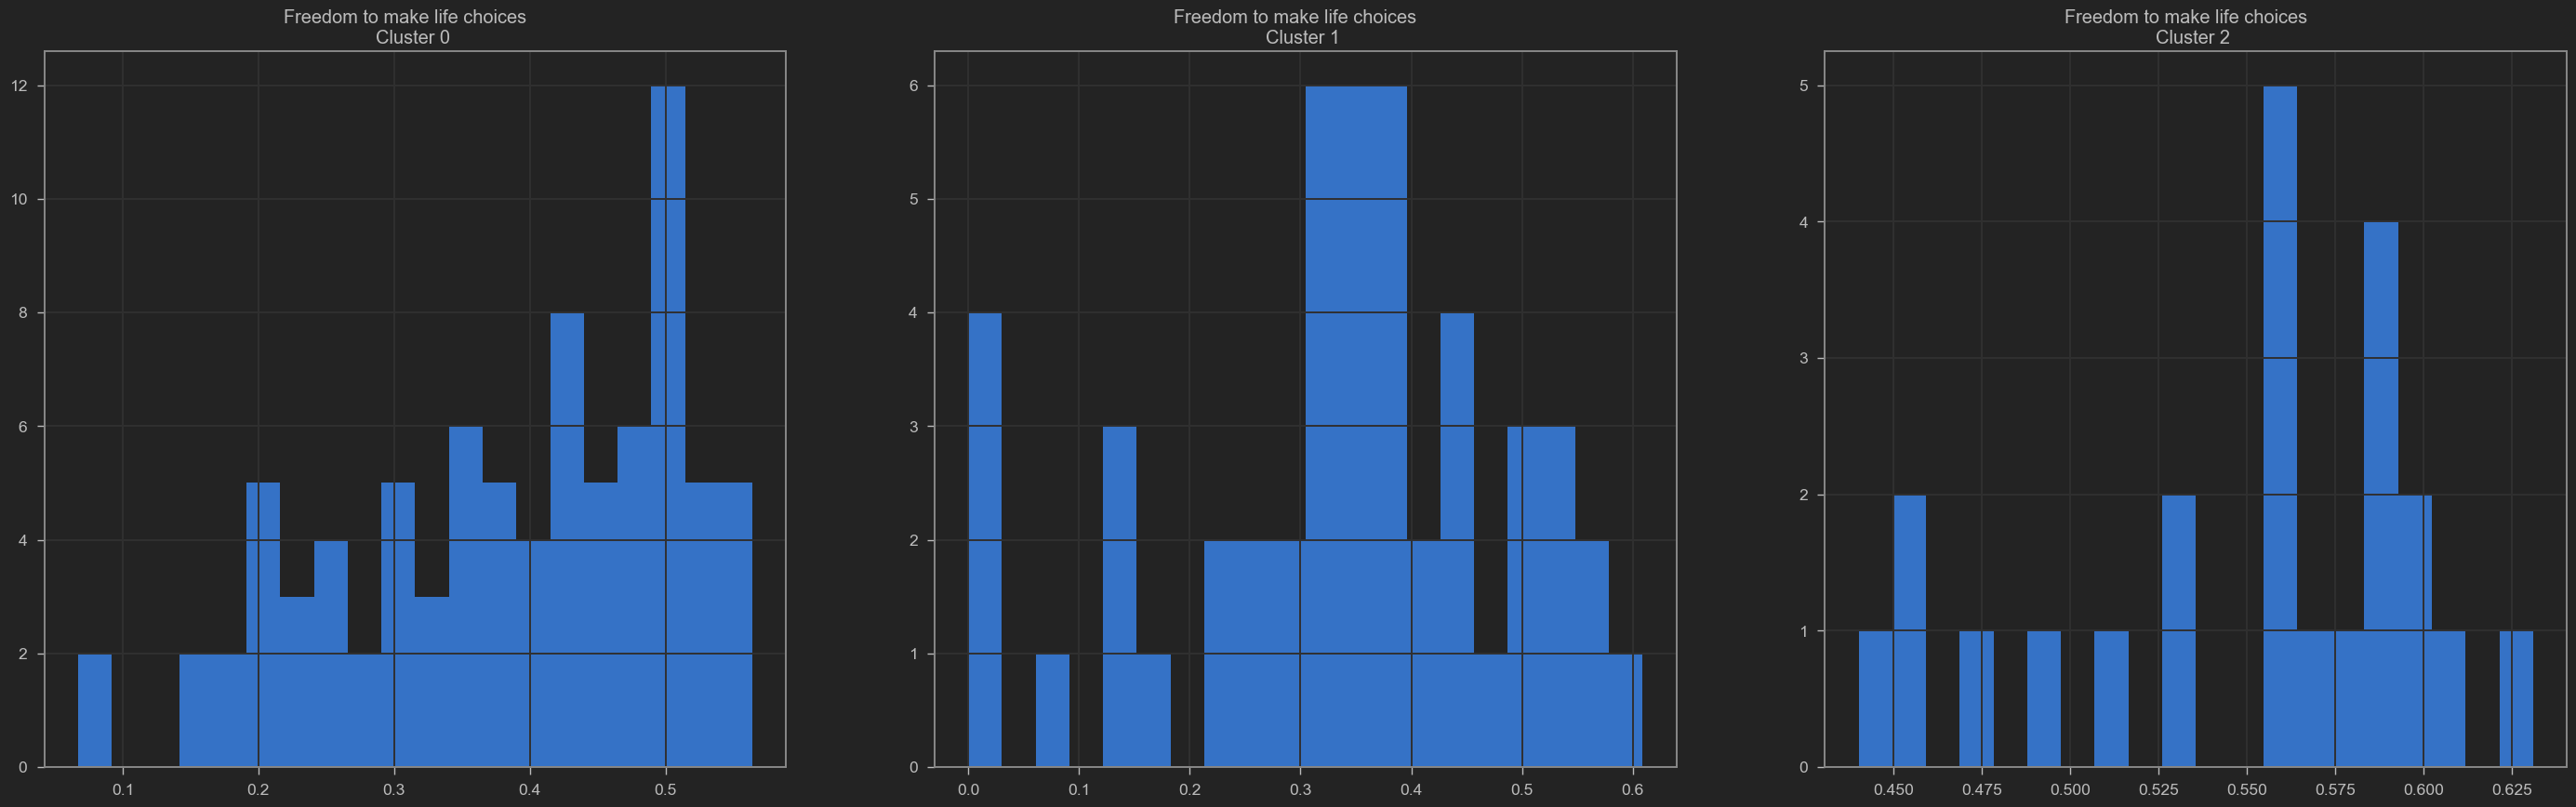

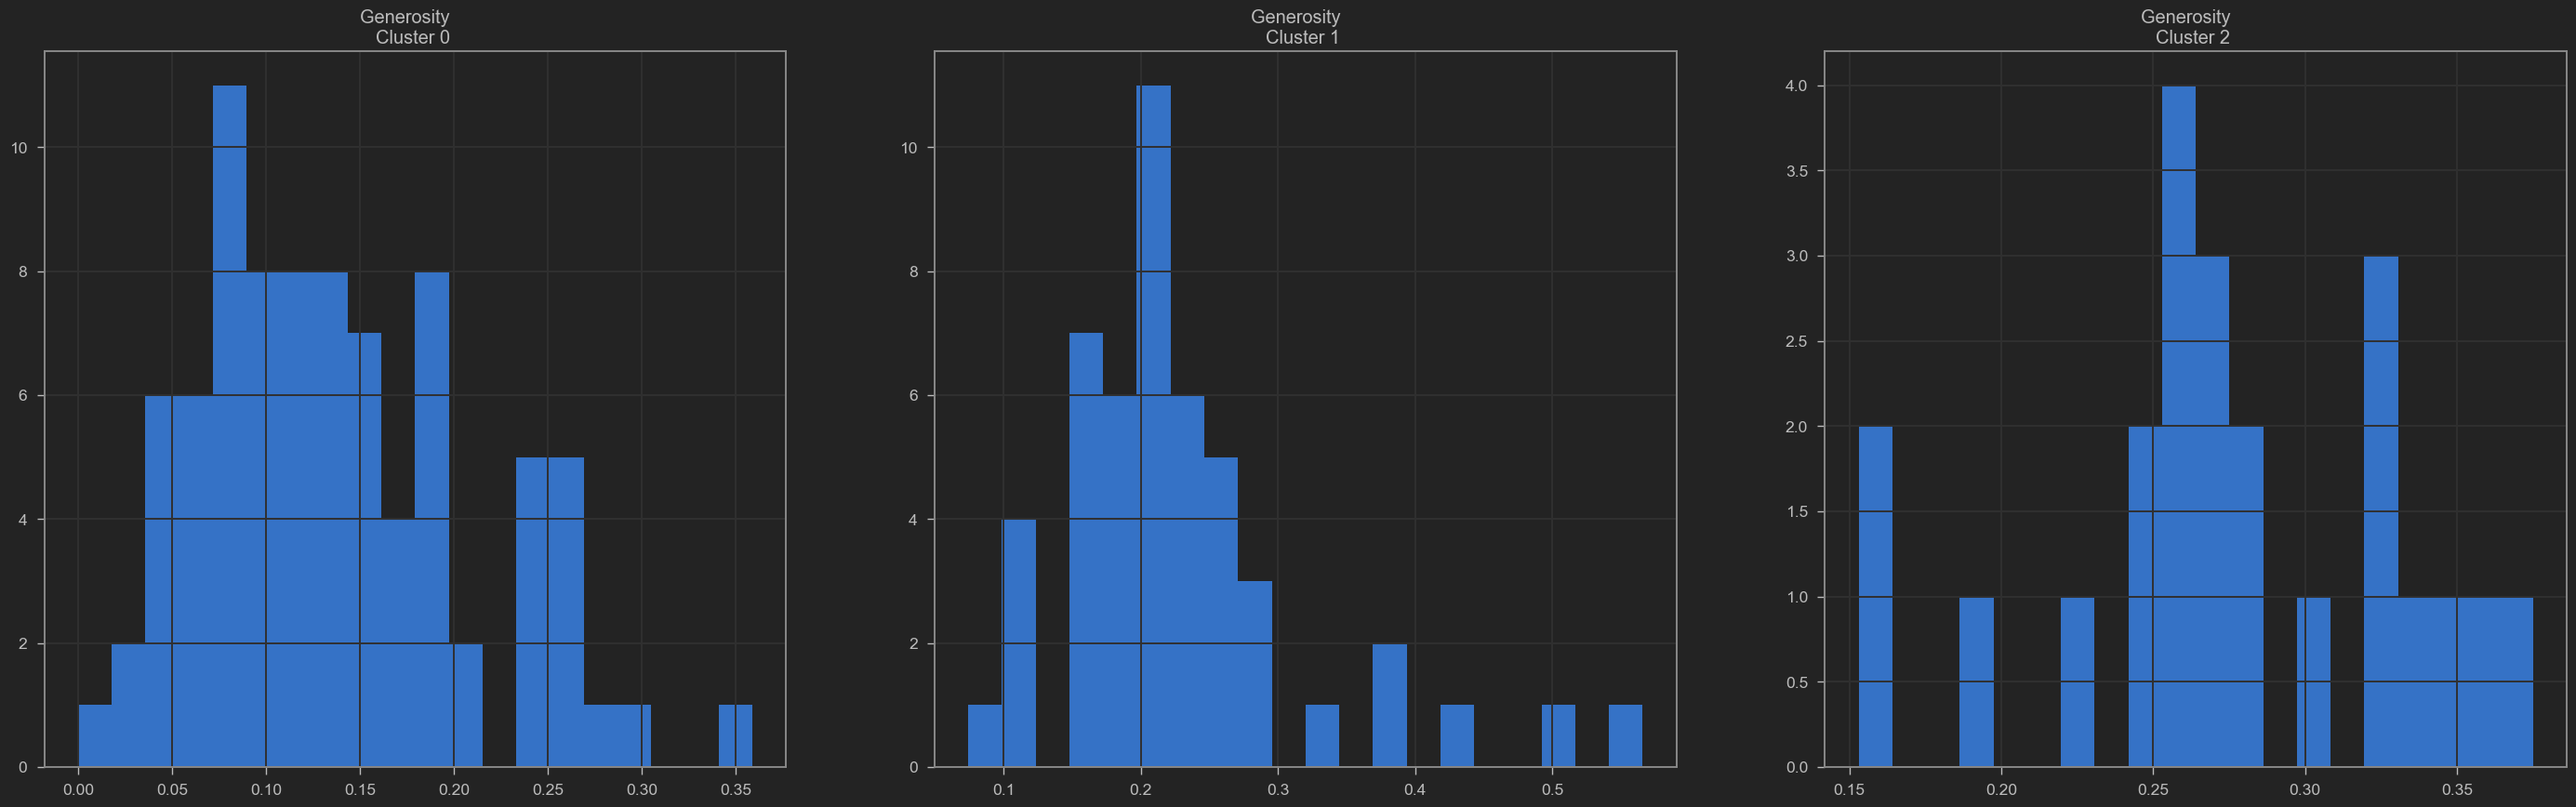

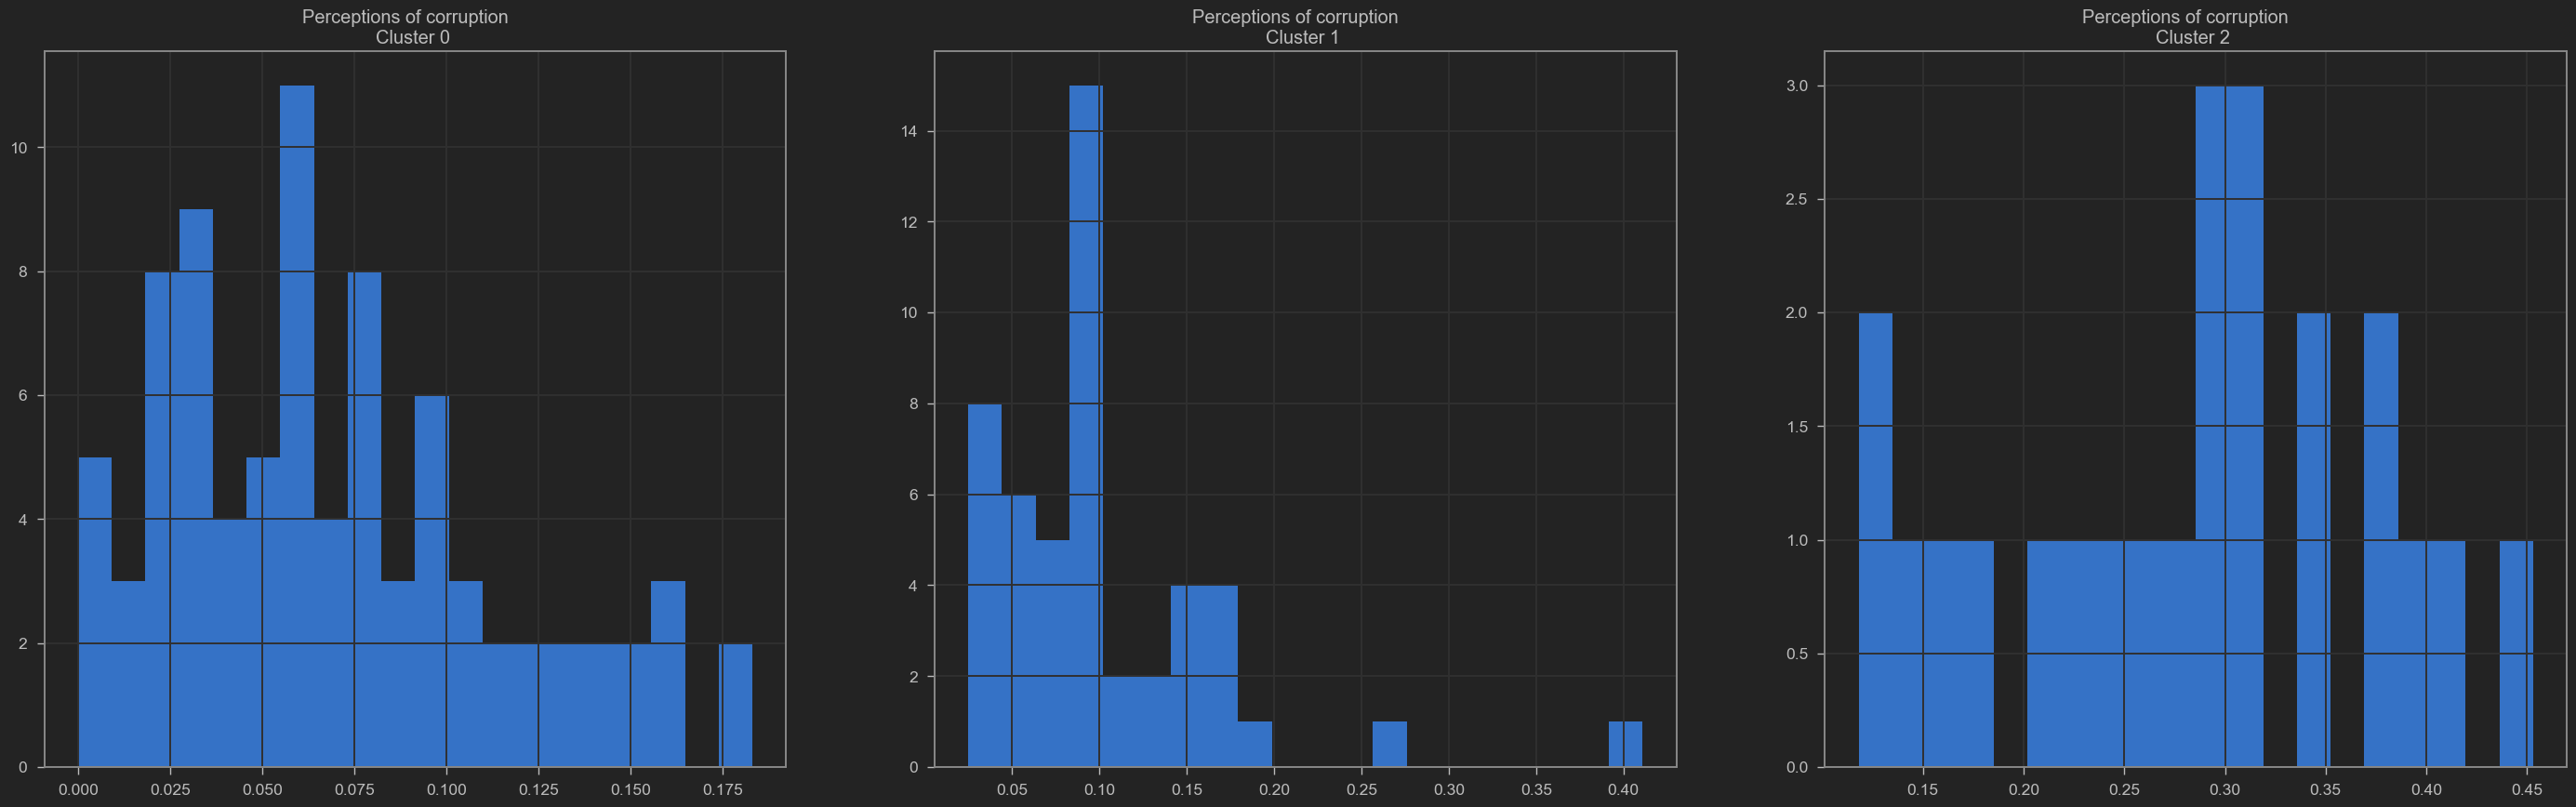

In [36]:
# Plot the histogram of various clusters
for i in df_seg.columns:
  plt.figure(figsize = (35, 10))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = happy_df_cluster[happy_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i, j))
  
  plt.show()



### VISUALIZE THE CLUSTERS

In [37]:
# Plot the relationship between cluster and score 

fig = px.scatter(happy_df_cluster, x = 'cluster', y = "Score",
           size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(
    title_text = 'Happiness Score vs Cluster'
)
fig.show()

In [38]:
# Plot the relationship between cluster and GDP

fig = px.scatter(happy_df_cluster, x='cluster', y='GDP per capita',
           size='Overall rank', color="Country or region", hover_name="Country or region",
          trendline= "ols")

fig.update_layout(
    title_text='GDP vs Clusters'
)
fig.show()

In [39]:
# Visaulizing the clusters with respect to economy, corruption, gdp, rank and their scores

import plotly.express as px

fig = px.scatter_3d(
    happy_df_cluster,
    x='GDP per capita',
    y='Perceptions of corruption',
    z='Healthy life expectancy',
    color='cluster',
    size='Score',
    hover_name='Country or region',
    title='Clusters based Impact of Economy, Corruption and Life Expectancy on Happiness Scores of Nations',
    color_continuous_scale='Portland'
)
fig.update_traces(marker=dict(opacity=0.8))
fig.update_layout(height = 1000)
fig.show()


In [40]:
fig = px.scatter_3d(
    happy_df_cluster,
    x='GDP per capita',
    y='Perceptions of corruption',
    z='Generosity',
    color='cluster',
    size='Score',
    hover_name='Country or region',
    title='Clusters based Impact of Economy, Corruption and Life Expectancy on Happiness Scores of Nations',
    color_continuous_scale='Portland'
)
fig.update_traces(marker=dict(opacity=0.8))
fig.update_layout(height = 1000)
fig.show()

In [41]:
# Visualizing the clusters geographically
data = dict(type = 'choropleth', 
           locations = happy_df_cluster["Country or region"],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = happy_df_cluster['cluster'], 
           text = happy_df_cluster["Country or region"],
           colorbar = {'title':'Clusters'})

layout = dict(title = 'Geographical Visualization of Clusters', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)